In [1]:
import numpy as np
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeaturel
import pandas as pd


# データの読み込み
data = np.load('/work/gi55/i55233/data/results/bsiso_eeof/prepro_anomaly_8vals.npz')
print('data = ', data.files)

data =  ['lat', 'lon', 'time', 'real_time', 'olr', 'u850', 'v850', 'u200', 'v200', 'h850', 'pr_wtr', 'sst']


In [2]:
lat = data['lat'][24:49]
lon = data['lon']
olr = data['olr'][80:,24:49,:]
#u850 = data['u850'][80:-80,24:49,:]
#v850 = data['v850'][80:-80,24:49,:]
#u200 = data['u200'][80:-80,24:49,:]
#v200 = data['v200'][80:-80,24:49,:]
#h850 = data['h850'][80:-80,24:49,:]
#pr_wtr = data['pr_wtr'][80:-80,24:49,:]
time = data['time'][80+10:]  # 射影後にデータが10日進むため、時刻の方を前進させておく
real_time = pd.to_datetime(time, unit='h', origin=pd.Timestamp('1800-01-01')) # 時刻をdatetime型に変換
#print(lat.shape, lon.shape, olr.shape, u850.shape, v850.shape, u200.shape, v200.shape, h850.shape, pr_wtr.shape)
print(real_time[0], real_time[-1])

1979-04-01 00:00:00 2022-12-31 00:00:00


(25, 144) (25, 144)


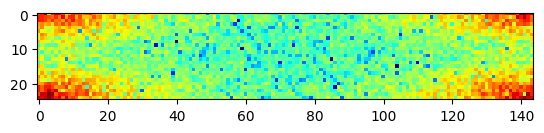

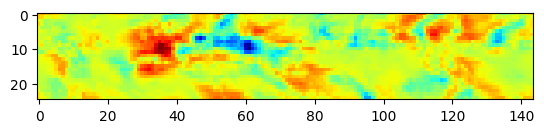

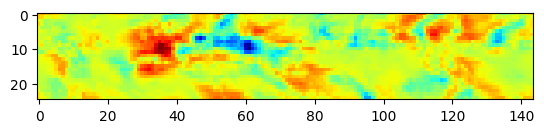

In [21]:
# 2d fft
t = 200
olr_fft = np.fft.fft2(olr[t])
olr_fft = np.fft.fftshift(olr_fft)
olr_psd = np.abs(olr_fft)**2
olr_psd = np.log10(olr_psd)
olr_psd = np.fft.fftshift(olr_psd)
# ifftで元に戻す
olr_ifft = np.fft.ifft2(np.fft.ifftshift(olr_fft))

print(olr_psd.shape, olr_fft.shape)
plt.figure()
plt.imshow(olr_psd, cmap='jet')
#plt.colorbar()
plt.show()
plt.figure()
plt.imshow(np.real(olr_ifft) + np.imag(olr_ifft), cmap='jet')
#plt.colorbar()
plt.show()
plt.figure()
plt.imshow(olr[t], cmap='jet')
#plt.colorbar()
plt.show()
